In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/MyDrive/saylani_ai_ds (1)/WineQT.csv")

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
df = df[["fixed acidity" , "residual sugar" , "free sulfur dioxide"]]
df.head()

,fixed acidity,residual sugar,free sulfur dioxide
0,7.4,1.9,11.0
1,7.8,2.6,25.0
2,7.8,2.3,15.0
3,11.2,1.9,17.0
4,7.4,1.9,11.0


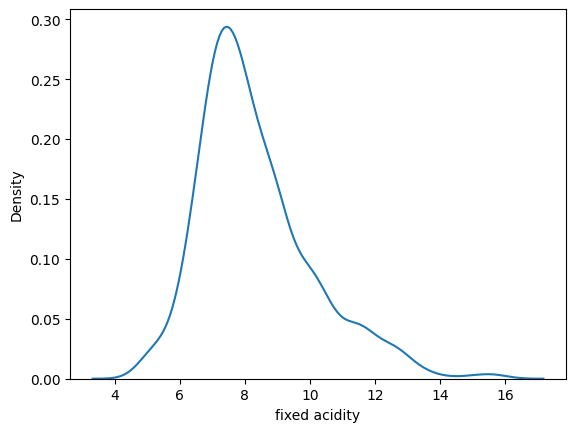

In [9]:
sns.kdeplot(df["fixed acidity"])
plt.show()

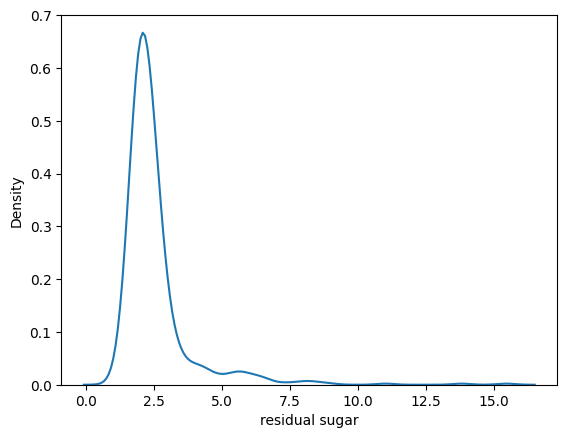

In [10]:
sns.kdeplot(df["residual sugar"])
plt.show()

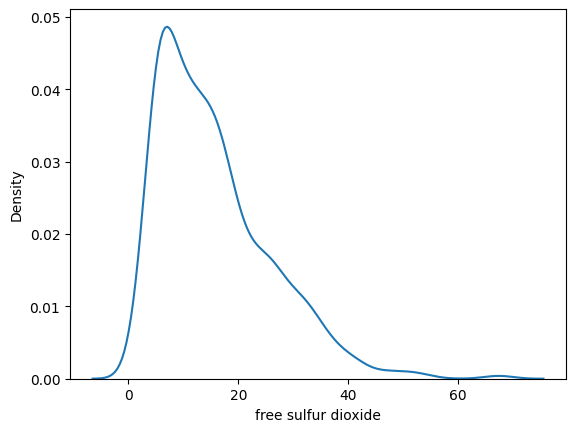

In [11]:
sns.kdeplot(df["free sulfur dioxide"])
plt.show()

In [13]:
x = df.drop("free sulfur dioxide" , axis=1)
y= df["free sulfur dioxide"]

In [14]:
x

,fixed acidity,residual sugar
0,7.4,1.9
1,7.8,2.6
2,7.8,2.3
3,11.2,1.9
4,7.4,1.9
...,...,...
1138,6.3,2.3
1139,6.8,1.9
1140,6.2,2.0
1141,5.9,2.2


In [15]:
y

,free sulfur dioxide
0,11.0
1,25.0
2,15.0
3,17.0
4,11.0
...,...
1138,29.0
1139,28.0
1140,32.0
1141,39.0


In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.3)

In [21]:
x_train.shape ,x_test.shape

((343, 2), (800, 2))

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(x_train)

MinMaxScaler()

In [26]:
x_trained_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
x_trained_scaled= pd.DataFrame(x_trained_scaled , columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns=x_test.columns)

In [28]:
x_train.describe()

,fixed acidity,residual sugar
count,343.000000,343.000000
mean,8.392711,2.489504
std,1.811861,1.148387
min,4.600000,0.900000
25%,7.200000,1.900000
50%,8.000000,2.200000
75%,9.150000,2.600000
max,15.600000,11.000000


In [30]:
x_trained_scaled.describe()

,fixed acidity,residual sugar
count,343.000000,343.000000
mean,0.344792,0.157377
std,0.164715,0.113702
min,0.000000,0.000000
25%,0.236364,0.099010
50%,0.309091,0.128713
75%,0.413636,0.168317
max,1.000000,1.000000


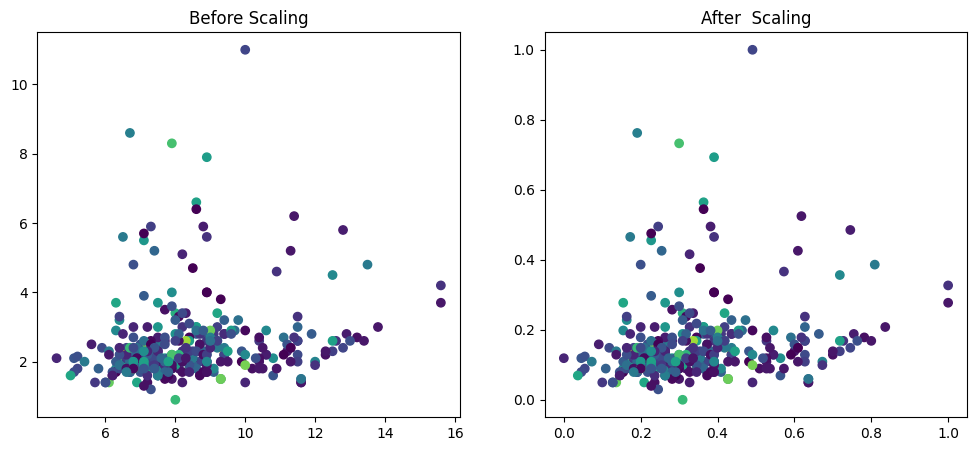

In [33]:
fig, (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(12,5))
ax1.scatter(x_train["fixed acidity"] , x_train["residual sugar"] , c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_trained_scaled["fixed acidity"] , x_trained_scaled["residual sugar"] , c=y_train)
ax2.set_title("After  Scaling")
plt.show()

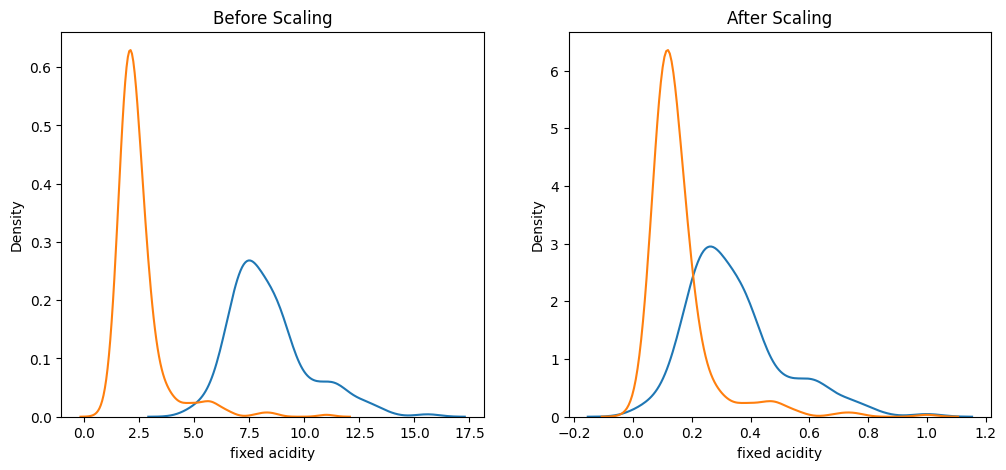

In [35]:
fig, (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train["fixed acidity"] , ax=ax1)
sns.kdeplot(x_train["residual sugar"] , ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(x_trained_scaled["fixed acidity"] , ax=ax2)
sns.kdeplot(x_trained_scaled["residual sugar"] , ax=ax2)

plt.show()

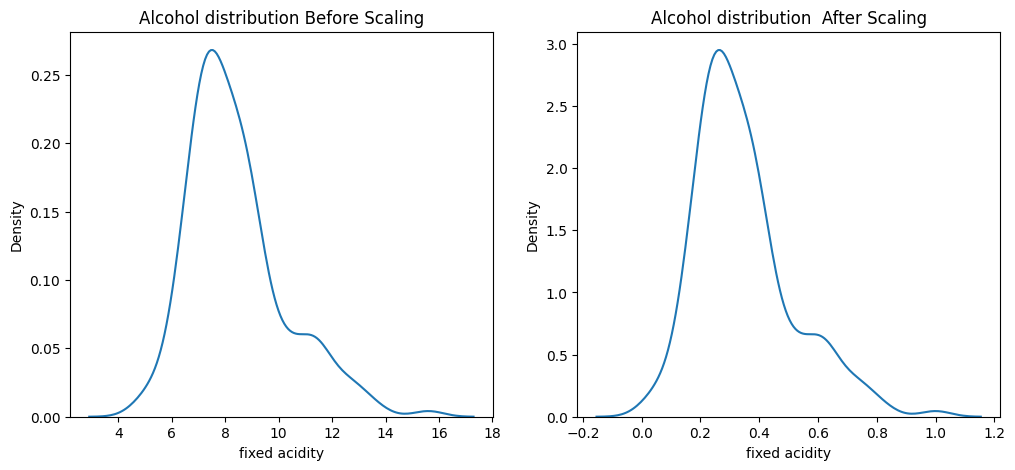

In [36]:
fig, (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(12,5))
ax1.set_title("Alcohol distribution Before Scaling")
sns.kdeplot(x_train["fixed acidity"] , ax=ax1)
ax2.set_title("Alcohol distribution  After Scaling")
sns.kdeplot(x_trained_scaled["fixed acidity"] , ax=ax2)
plt.show()

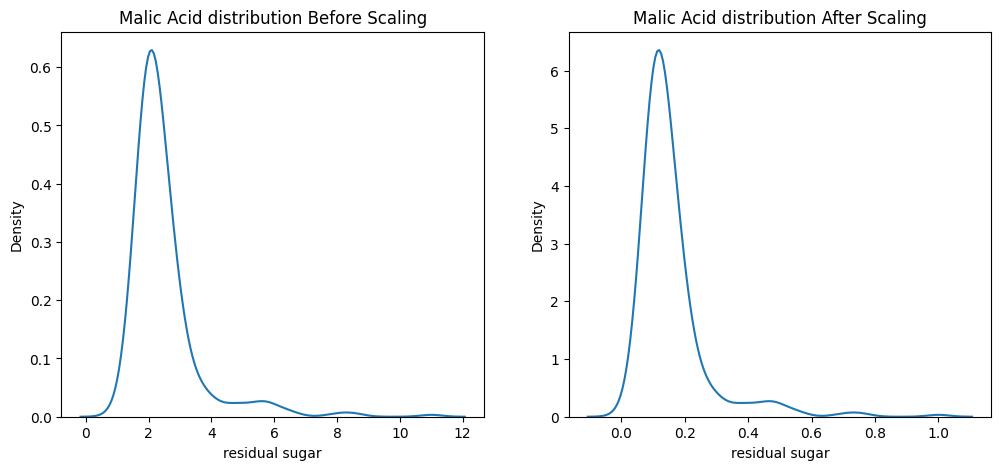

In [37]:
fig, (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(12,5))
ax1.set_title("Malic Acid distribution Before Scaling")

sns.kdeplot(x_train["residual sugar"] , ax=ax1)
ax2.set_title("Malic Acid distribution After Scaling")

sns.kdeplot(x_trained_scaled["residual sugar"] , ax=ax2)

plt.show()